In [101]:
import os 
import tensorflow as tf
import cv2
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub

import shutil

In [46]:
TRAIN_IMAGES_PATH = os.path.join('dataset', 'train')

names = os.listdir(TRAIN_IMAGES_PATH) # all file in folder

In [29]:
IMAGE_EXMPLE_PATH = os.path.join(TRAIN_IMAGES_PATH, names[5])
NAME_EXMPLE_LIST = os.listdir(IMAGE_EXMPLE_PATH)

### Example du datasets

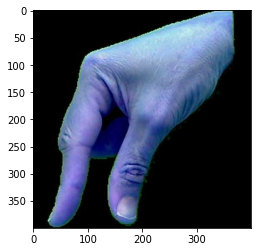

In [30]:
IMAGE_PATH = os.path.join(IMAGE_EXMPLE_PATH, NAME_EXMPLE_LIST[1])


img = np.array(cv2.imread(IMAGE_PATH))
plt.imshow(img)
plt.show()

In [74]:
img.shape

(400, 400, 3)

In [68]:
TRAIN_IMAGES_PATH = os.path.join('dataset', 'test')

names = os.listdir(TRAIN_IMAGES_PATH)

len(names)

36

In [72]:
# pour spliter les donnees entre train et test

IMAGE_PATH = ''

for i in names:
    IMAGES_PATH = os.path.join('dataset', 'test', i)
    list_images = os.listdir(IMAGES_PATH)
    for j in list_images[10:]:
        IMAGE_PATH = os.path.join('dataset', 'test', i, j)
        #os.remove(IMAGE_PATH)


 ### preparation des données

In [79]:
IMAGE_RES = 224
IMAGE_SHAPE = (IMAGE_RES, IMAGE_RES)
TRAINING_DATA_DIR = 'dataset/train'
VALID_DATA_DIR = 'dataset/test'

In [111]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
)

train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    #target_size=IMAGE_SHAPE,
)

valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    #target_size=IMAGE_SHAPE,
)

Found 2160 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


### building a model

In [112]:
URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [113]:
feature_extractor.trainable = False

In [116]:
model = tf.keras.Sequential([feature_extractor,
                             tf.keras.layers.Dense(40, activation= 'relu'),
                             tf.keras.layers.Dense(36, activation= 'softmax')
                            ])


In [117]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              5919312   
_________________________________________________________________
dense_16 (Dense)             (None, 40)                51240     
_________________________________________________________________
dense_17 (Dense)             (None, 36)                1476      
Total params: 5,972,028
Trainable params: 52,716
Non-trainable params: 5,919,312
_________________________________________________________________
None


In [118]:
EPOCHS = 20
BATCH_SIZE = 50
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
43/43 [==============================] - 68s 1s/step - loss: 3.3330 - accuracy: 0.1382 - val_loss: 2.9708 - val_accuracy: 0.2500
Epoch 2/20
43/43 [==============================] - 66s 2s/step - loss: 2.7195 - accuracy: 0.3176 - val_loss: 2.3774 - val_accuracy: 0.4196
Epoch 3/20
43/43 [==============================] - 63s 1s/step - loss: 2.0845 - accuracy: 0.5074 - val_loss: 1.8213 - val_accuracy: 0.6071
Epoch 4/20
43/43 [==============================] - 61s 1s/step - loss: 1.6446 - accuracy: 0.6382 - val_loss: 1.4997 - val_accuracy: 0.6384
Epoch 5/20
43/43 [==============================] - 66s 2s/step - loss: 1.3424 - accuracy: 0.6985 - val_loss: 1.2135 - val_accuracy: 0.7723
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 1.1523 - accuracy: 0.7169 - val_loss: 0.9737 - val_accuracy: 0.7991
Epoch 7/20
43/43 [==============================] - 66s 2s/step - loss: 0.9825 - accuracy: 0.7699 - val_loss: 0.9163 - val_accuracy: 0.8482
Epoch 8/20
43/43 [==

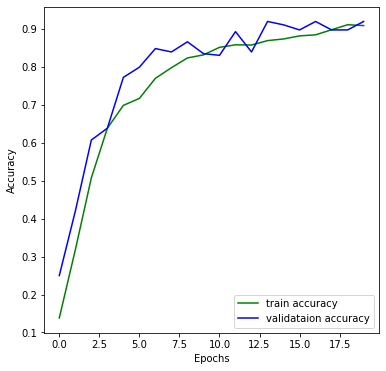

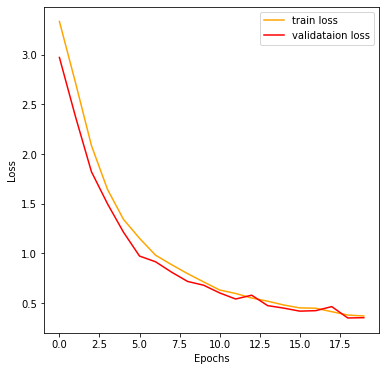

In [120]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']


def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(6, 6))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(6, 6))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('loss.png')
    plt.show()
    
save_plots(train_acc, valid_acc, train_loss, valid_loss)